


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




2022-03-30 00:18:24.482241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-30 00:18:24.726636: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-30 00:18:24.726706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LACIA): /proc/driver/nvidia/version does not exist
2022-03-30 00:18:24.728714: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-03-30 00:18:24.739242: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800500000 Hz
2022-03-30 00:18:24.740000: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564724e7dc40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2

Start training
Step:0, loss==0.7923, W==0.2278, b==0.1504
Step:100, loss==0.1843, W==0.3216, b==0.3028
Step:200, loss==0.1726, W==0.3065, b==0.4098
Step:300, loss==0.1654, W==0.2947, b==0.4938
Step:400, loss==0.1609, W==0.2854, b==0.5596
Step:500, loss==0.1582, W==0.2781, b==0.6112
Step:600, loss==0.1565, W==0.2724, b==0.6517
Step:700, loss==0.1555, W==0.2679, b==0.6834
Step:800, loss==0.1549, W==0.2644, b==0.7083
Step:900, loss==0.1545, W==0.2616, b==0.7278
Step:1000, loss==0.1542, W==0.2595, b==0.7430
Linear Regression Model: Y==0.2595*X+0.7430


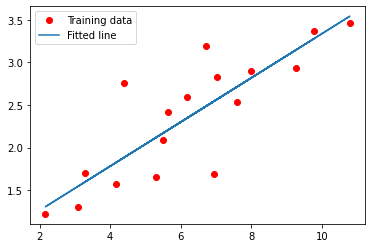

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

# 超参数
# 学习率
learning_rate = 0.01
# 最大训练步数
max_train_steps = 1000
# 日志打印间隔
log_step = 100

# 输入数据
# 构造训练数据
train_X = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779],
                    [6.182], [7.59], [2.167], [7.042], [10.791], [5.313],
                    [7.997], [5.654], [9.27], [3.1]], dtype=np.float32)
train_Y = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366],
                    [2.596], [2.53], [1.221], [2.827], [3.465], [1.65],
                    [2.904], [2.42], [2.94], [1.3]], dtype=np.float32)
total_samples = train_X.shape[0]

# 构建模型
# 输入数据
X = tf.placeholder(tf.float32, [None, 1])
# 模型参数
W = tf.Variable(tf.random_normal([1, 1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 推理值
Y = tf.matmul(X, W) + b

# 定义损失函数
# 实际值
Y_ = tf.placeholder(tf.float32, [None, 1])
# 均方差
loss = tf.reduce_sum(tf.pow(Y-Y_, 2)) / (total_samples)

# 创建优化器
# 随机梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# 定义单步训练操作
# 最小化损失值
train_op = optimizer.minimize(loss)

# 创建会话
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    # 迭代训练
    print("Start training")
    for step in range(max_train_steps):
        sess.run(train_op, feed_dict={X: train_X, Y_:train_Y})
        # 每隔log_step步打印一次日志
        if step % log_step == 0:
            c = sess.run(loss, feed_dict={X: train_X, Y_:train_Y})
            print("Step:%d, loss==%.4f, W==%.4f, b==%.4f" %
                (step, c, sess.run(W), sess.run(b)))
    # 计算训练完毕的模型在训练集上的损失值，并将其作为指标输出
    final_loss = sess.run(loss, feed_dict={X: train_X, Y_:train_Y})
    # 计算训练完毕的模型参数W和b
    weight, bias = sess.run([W, b])
    print("Step:%d, loss==%.4f, W==%.4f, b==%.4f" %
                (max_train_steps, final_loss, sess.run(W), sess.run(b)))
    print("Linear Regression Model: Y==%.4f*X+%.4f" % (weight, bias))

# 模型可视化
# 初始化matplotlib后端
# %matplotlib
# 根据训练数据X和Y，添加对应的红色圆点
plt.plot(train_X, train_Y, 'ro', label='Training data')
# 根据模型参数和训练数据，添加蓝色(默认色)拟合直线
plt.plot(train_X, weight * train_X + bias, label='Fitted line')
# 添加图例说明
plt.legend()
# 绘制图形
plt.show()
